<h1><b>Import Library</h1>

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

<h1><b>Load Data</h1>

In [44]:
df=pd.read_csv('songs_normalize.csv')
df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


<h1><b>Music based on Genre</h1>

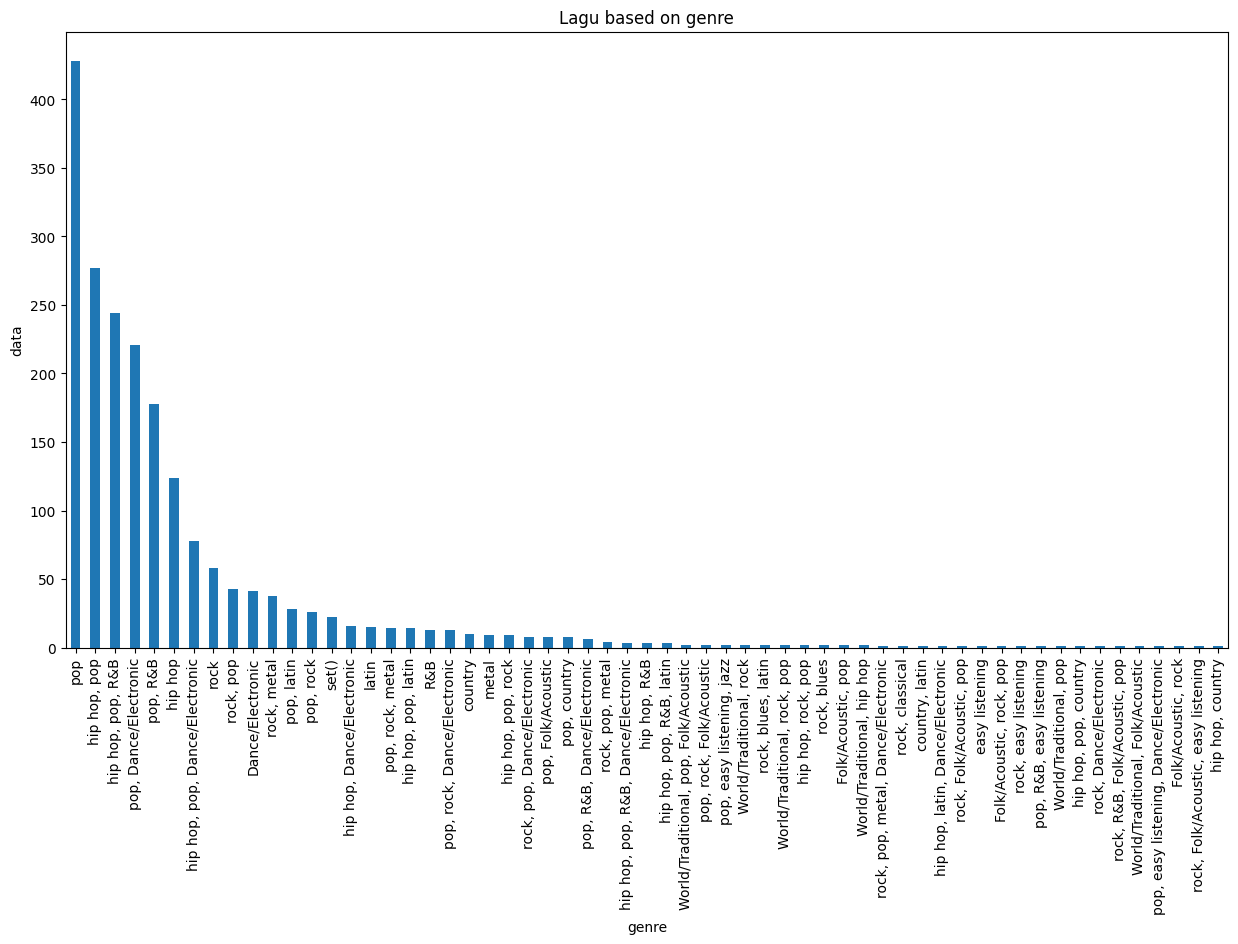

In [46]:
plt.figure(figsize=(15, 8))
df['genre'].value_counts().plot(kind='bar')
plt.xlabel('genre')
plt.ylabel('data')
plt.title('Lagu based on genre')
plt.show()

<h1><b>Music Duration</h1>

In [47]:
def ms_to_minsec(ms):
    sec = ms / 1000
    return f"{int(sec // 60)}:{int(sec % 60)}"

durations = df[['duration_ms','year']].groupby('year').mean().reset_index().iloc[1:-1]
durations['duration_s'] = durations['duration_ms'] / 1000
durations['min:sec'] = durations['duration_ms'].apply(ms_to_minsec)

fig = px.line(durations,
              x='year',
              y='duration_s',
              title='Rata-Rata Durasi Lagu dari Tahun ke Tahun',
              text='min:sec')
fig.update_xaxes(type='category')
fig.update_traces(textposition='top right')
iplot(fig)


<h2>Dari line chart diatas diperoleh informasi bahwa durasi lagu secara rata-rata dari tahun ke tahun mengalami penurunan atau durasi lagu semakin singkat</h2>

<h1><b>Number of Songs per Year</h1>

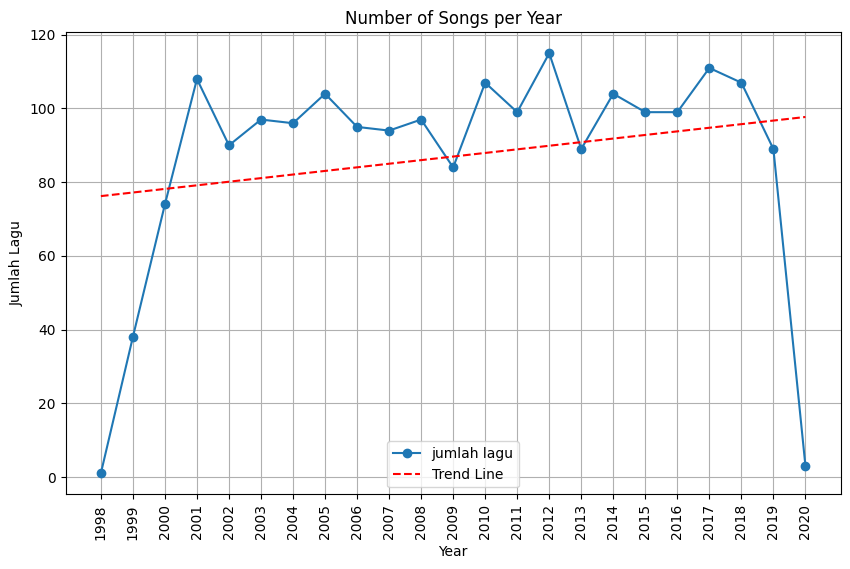

In [48]:
import matplotlib.pyplot as plt
import numpy as np

lagu_tahun = df['year'].value_counts().sort_index()


plt.figure(figsize=(10, 6))
plt.plot(lagu_tahun.index, lagu_tahun.values, marker='o', label='jumlah lagu')


z = np.polyfit(lagu_tahun.index, lagu_tahun.values, 1)  # Koefisien
p = np.poly1d(z)  # Objek Polinomial
plt.plot(lagu_tahun.index, p(lagu_tahun.index), "r--", label="Trend Line")

plt.xlabel('Year')
plt.ylabel('Jumlah Lagu')
plt.title('Number of Songs per Year')
plt.legend()

plt.xticks(np.arange(min(lagu_tahun.index), max(lagu_tahun.index)+1, 1), rotation = 90)

plt.grid(True)
plt.show()


<h2>Secara tren dari tahun ke tahun jumlah musik atau lagu yang diproduksi semakin meningkat</h2>

<h1><b>Top 10 Artists by Popularity</h1>

In [49]:
popularity = df.groupby('artist')['popularity'].mean()

top_10_popularity = popularity.sort_values(ascending=False).head(10)
data = [
    {
        'x': top_10_popularity.index,  
        'y': top_10_popularity.values,  
        'mode': 'markers',
        'marker': {
            'color': top_10_popularity.values,  
            'size': top_10_popularity.values * 1,  
            'showscale': True
        },
        'text': top_10_popularity.index  
    }
]
iplot(data)


<h2>Berikut merupakan Top 10 artis yang paling populer berdasarkan nilai rata-rata yang diperoleh tiap artis</h2>

<h1><b>Data Correlation</h1>

In [50]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns.tolist()

data = df[numerical_columns]
data["index"] = np.arange(1, len(data) + 1)

fig = ff.create_scatterplotmatrix(data, diag='box', index='index', colormap='Portland',
                                  colormap_type='cat', height=1600, width=1600)
iplot(fig)

In [51]:
df_corr = df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(df_corr, annot=True,annot_kws={'size':12},mask=np.triu(df_corr))

plt.show()

<h2>Dapat dilihat bahwa korelasi yang dimiliki untuk setiap unsur lagu dengan popularitas suatu lagu masih cukup kecil sehingga butuh pengolahan lebih lanjut atau mencari faktor lain yang dapat lebih cocok dijadikan faktor jika ingin memprediksi popularitas sebuah lagu.</h2>